<a href="https://colab.research.google.com/github/aijaza1/Azeem-old-website/blob/master/Analyzing_Chat_Log_Data_Sets_For_Digital_Forensics_Using_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Analyzing Chat Log Data Sets For Digital Forensics Using Data Science**
---



# Background Information

Digital Forensics is a science that focuses on identifying, gathering, processing, analysing, and 
reporting of data stored electronically. Computer emails, text messages, images, documents, and internet histories 
are all very important pieces of information that can be extracted from electronic devices.
 
An analyst will have to examine these computer files from a user or suspect and try and preserve the 
evidence in its most original form. Any alarming piece of information from these computer files can be used 
as evidence. 

Usually, the size of the electronic data and files are huge, and will take a great deal of time to go through 
every file or text message manually. This is where Data Science can be very beneficial to Digital Forensics.

Often times there are situations where you may have to view a users chat logs. You may have to read through 
their messages to see their conversation, who their communicating with, potential partners, or other key 
pieces of evidence. 




# What We Will Be Doing

We will be giving you some tips on how exactly we can condense and organize chat logs down to a smaller size 
which can be more easily analyzed. We will be explaining how to organize the data in a better fashion, 
remove duplicates, clean bad or useless data, and more.

For this example we will be viewing a public Discord server, specifically of four different programming language communities such as Python, Go, Clojure, and Racket. These servers are public and serve as a resource for getting 
technical help, sharing knowledge, and also real-time conversations between fellow community members.

# Learning Goals

Learning Goals for this tutorial:

*   Use Pandas to manipulate a data set
*   Cleaning data
*   Analyze/sort through the data set
*   Be able to pull specific details from the data set







# Acquiring the Discord Datasets

This demonstration is based off of Preetha Chatterjee and her team of engineers' research, DISCO: A Dataset of Discord Chat Conversations for Software Engineering Research. 

Download the dataset here (https://zenodo.org/record/5909202#.Y91yPnbMKUk).

# Getting Started

To first get started, we will import some libraries that will help us process and go through data sets.
We will be using the 'pandas' library, an open source data analysis and manipulation tool, built on top of the 
Python programming langage.

We will also use the 'numpy' library to help us use arrays to better organize our data.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Now we must load in the dataset we have downloaded. For this tutorial we will be using chat logs in the Python server from December 2019.

**The file is called (pythongeneralDec2019.xml).**


We will read in our data set using the pandas library we imported. 


We are going to be storing our data set of chat logs into a variable called "df" and will use the 'pandas' library to read the xml file.

There are a few ways to insert the dataset file.

**Option 1) 'Recommended'**

One way, where you don't have to load in the file everytime we run it is to store it in the google drive.

Either in google drive or in the files section on the left hand side of this Google Colab page, upload the month of chat logs we will be experimenting with **(pythongeneralDec2019.xml)** into "content" then "drive" folder. 

Then you can use the following command:

In [56]:
df = pd.read_xml('/content/drive/MyDrive/pythongeneralDec2019.xml')

**Option 2)**

Another way is to directly upload the file in the files section on the left hand side of this Google Colab page.

You must insert the file in the "content" folder. The only issue with this way is that you will need to upload the file everytime we run.

Then you can use the following code to load in the file into our workspace:

In [ ]:
df = pd.read_xml('pythongeneralDec2019.xml')

XMLSyntaxError: ignored

Now that we have our file, 
lets take a look at what our data consists of using the "info" method. 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30944 entries, 0 to 30943
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_domain   1 non-null      object
 1   channel_name  1 non-null      object
 2   start_date    1 non-null      object
 3   end_date      1 non-null      object
 4   ts            30940 non-null  object
 5   user          30940 non-null  object
 6   text          30940 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


Here we can see a more general view of what our data set consists of. This shows our different column names as well as how many values are in these columns. Notice the first four columns, there is only one piece of data in these columns.

Using just the "df" command, now we see exactly what our data in the data set consists of as a whole.


In [58]:
df

,team_domain,channel_name,start_date,end_date,ts,user,text
0,Python,None,None,None,None,None,None
1,None,python-general,None,None,None,None,None
2,None,None,2019-12-01T00:56:23.288000,None,None,None,None
3,None,None,None,2019-12-31T18:29:57.380000,None,None,None
4,None,None,None,None,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
...,...,...,...,...,...,...,...
30939,None,None,None,None,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,None,None,None,None,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,None,None,None,None,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,None,None,None,None,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


# Data Cleaning

Notice the first four columns again, we only have one piece of information in each of these columns, and they aren't that useful to us. We do not need to work with the name of the discord channel as well as the start and end date/time. 

We will start by getting rid of these first four columns and rows of data to simplify and condense down our data set.

Let's use the "drop" method to get rid of our first four rows of data.

Then, let's take a look at what it looks like.

In [59]:
df = df.drop(range(0,4))

df

,team_domain,channel_name,start_date,end_date,ts,user,text
4,None,None,None,None,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,None,None,None,None,2019-12-01T01:07:04.875000,Jayvien,say what?
6,None,None,None,None,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,None,None,None,None,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,None,None,None,None,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...,...,...,...,...
30939,None,None,None,None,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,None,None,None,None,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,None,None,None,None,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,None,None,None,None,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


Our data set looks a little cleaner now. However, now we have four rows full of empty or null data.

Lets now get rid of these first four columns to condense our table down into a more readable table.

We will use the same "drop" method but we will specify what columns exactly we want to drop as well as use "axis=1" to specify we want to drop a column instead of a rows.

In [60]:
df = df.drop(labels="team_domain", axis=1)

df

,channel_name,start_date,end_date,ts,user,text
4,None,None,None,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,None,None,None,2019-12-01T01:07:04.875000,Jayvien,say what?
6,None,None,None,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,None,None,None,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,None,None,None,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...,...,...,...
30939,None,None,None,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,None,None,None,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,None,None,None,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,None,None,None,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


As you can see we dropped the "team_domain" column successfully. 

Lets get rid of the last three empty columns then take a look at how our data set table looks.

In [61]:
df = df.drop(labels="channel_name", axis=1)
df = df.drop(labels="start_date", axis=1)
df = df.drop(labels="end_date", axis=1)

df

,ts,user,text
4,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,2019-12-01T01:07:04.875000,Jayvien,say what?
6,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...
30939,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


# Formatting

Our table looks much cleaner now, we consolidated the data down into data we want to actually look at.

Lets next rename the 'ts' column into 'time' just to better clarify. We will use the "rename" method to do so.

In [62]:
df.rename(columns = {'ts':'time'}, inplace = True)

df

,time,user,text
4,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,2019-12-01T01:07:04.875000,Jayvien,say what?
6,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...
30939,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


Our table is now more simpiler to look at. However if you take a look at the time column, with the format, it is very hard to read what it says.

Let's now re-format this column to be able to read the time each message was sent.

We will use the 'pandas' library once again as well as the "to_datetime" method to re-format this column in a more readable way.

In [63]:
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d")

df

,time,user,text
4,2019-12-01 00:56:23.288,Ryden,where is the name of the file stored on the file?
5,2019-12-01 01:07:04.875,Jayvien,say what?
6,2019-12-01 01:10:54.022,Kaliope,Where would you guys recommend I learn kotlin ...
7,2019-12-01 01:13:29.732,Naely,I used the official Kotlin docs they have an e...
8,2019-12-01 01:16:43.656,Jayvien,do they?
...,...,...,...
30939,2019-12-31 18:24:58.198,Azyriah,hi @GokturkSM
30940,2019-12-31 18:25:37.421,Areesha,Anyone have some math background? Trying to im...
30941,2019-12-31 18:26:17.603,Areesha,My question is... what exactly is a cyclic gro...
30942,2019-12-31 18:29:15.676,Ailany,You need to know what exceptions your code may...


Additionally, we can add in the day of the week each messages was sent.



In [64]:
df['day'] = df['time'].dt.day_name()

df

,time,user,text,day
4,2019-12-01 00:56:23.288,Ryden,where is the name of the file stored on the file?,Sunday
5,2019-12-01 01:07:04.875,Jayvien,say what?,Sunday
6,2019-12-01 01:10:54.022,Kaliope,Where would you guys recommend I learn kotlin ...,Sunday
7,2019-12-01 01:13:29.732,Naely,I used the official Kotlin docs they have an e...,Sunday
8,2019-12-01 01:16:43.656,Jayvien,do they?,Sunday
...,...,...,...,...
30939,2019-12-31 18:24:58.198,Azyriah,hi @GokturkSM,Tuesday
30940,2019-12-31 18:25:37.421,Areesha,Anyone have some math background? Trying to im...,Tuesday
30941,2019-12-31 18:26:17.603,Areesha,My question is... what exactly is a cyclic gro...,Tuesday
30942,2019-12-31 18:29:15.676,Ailany,You need to know what exceptions your code may...,Tuesday


Now let's fix the time for when each message was sent as it looks very messy at the moment.

First, we can re-format the 'time' column and convert the time to just include the hour and minute. This way it's a little more readable and not as cluttered as before.

In [65]:
df['time'] = pd.to_datetime(df['time'], dayfirst=True).dt.strftime("%Y-%m-%d %H:%M")

df

,time,user,text,day
4,2019-12-01 00:56,Ryden,where is the name of the file stored on the file?,Sunday
5,2019-12-01 01:07,Jayvien,say what?,Sunday
6,2019-12-01 01:10,Kaliope,Where would you guys recommend I learn kotlin ...,Sunday
7,2019-12-01 01:13,Naely,I used the official Kotlin docs they have an e...,Sunday
8,2019-12-01 01:16,Jayvien,do they?,Sunday
...,...,...,...,...
30939,2019-12-31 18:24,Azyriah,hi @GokturkSM,Tuesday
30940,2019-12-31 18:25,Areesha,Anyone have some math background? Trying to im...,Tuesday
30941,2019-12-31 18:26,Areesha,My question is... what exactly is a cyclic gro...,Tuesday
30942,2019-12-31 18:29,Ailany,You need to know what exceptions your code may...,Tuesday


Next, we can split the "time" column because it's still difficult to read. 

Lets split this column into two columns. We can have one column for the "date" and another column for the "time". This way we can distinguish the numbers better.

Let's create two columns called "date" & "time". We just have to apply the 'split' method to our current "time" column, where we can split by the space in-between the date and the time of when each message was sent.

In [66]:
df[['date', 'time']] = df["time"].apply(lambda x: pd.Series(str(x).split(" ")))

df

,time,user,text,day,date
4,00:56,Ryden,where is the name of the file stored on the file?,Sunday,2019-12-01
5,01:07,Jayvien,say what?,Sunday,2019-12-01
6,01:10,Kaliope,Where would you guys recommend I learn kotlin ...,Sunday,2019-12-01
7,01:13,Naely,I used the official Kotlin docs they have an e...,Sunday,2019-12-01
8,01:16,Jayvien,do they?,Sunday,2019-12-01
...,...,...,...,...,...
30939,18:24,Azyriah,hi @GokturkSM,Tuesday,2019-12-31
30940,18:25,Areesha,Anyone have some math background? Trying to im...,Tuesday,2019-12-31
30941,18:26,Areesha,My question is... what exactly is a cyclic gro...,Tuesday,2019-12-31
30942,18:29,Ailany,You need to know what exceptions your code may...,Tuesday,2019-12-31


Now we can read the date and time each message was sent in a much more readable view.

One last thing we can do to better format our table is to change the order of the columns.

For this example, lets format it from date - time - user - text - day.

In [68]:
df = df[['date','time','user', 'text', 'day']]

df

,date,time,user,text,day
4,2019-12-01,00:56,Ryden,where is the name of the file stored on the file?,Sunday
5,2019-12-01,01:07,Jayvien,say what?,Sunday
6,2019-12-01,01:10,Kaliope,Where would you guys recommend I learn kotlin ...,Sunday
7,2019-12-01,01:13,Naely,I used the official Kotlin docs they have an e...,Sunday
8,2019-12-01,01:16,Jayvien,do they?,Sunday
...,...,...,...,...,...
30939,2019-12-31,18:24,Azyriah,hi @GokturkSM,Tuesday
30940,2019-12-31,18:25,Areesha,Anyone have some math background? Trying to im...,Tuesday
30941,2019-12-31,18:26,Areesha,My question is... what exactly is a cyclic gro...,Tuesday
30942,2019-12-31,18:29,Ailany,You need to know what exceptions your code may...,Tuesday


Great! Our table of data looks much more organized now.

Finally, we can start analyzing some of these messages.

# Analysis

Since our data frame is now more organized and cleaned up, we can start analyzing some of the data stored.

Lets take a look at how much data in our columns there is to go through by using the "count" method.

In [69]:
df.count()

date    30940
time    30940
user    30940
text    30940
day     30940
dtype: int64

## Text Analysis

The result shows that we have 30,940 different text messages in this data set, which is a lot to manually look through.

We can analyze this information in a much easier way by using code.

Lets first take a look at the "user" column. 

We can count how many messages each user has sent by incorporating the "groupby" method along with the "count" method.

In [70]:
df.groupby(['user'])['user'].count()

user
Aashvi         17
Abbott         37
Abdalahe        6
Abdelfetah      5
Abdelmadjid    76
               ..
Zuma            1
Zurisadai       4
Zuriya         25
Zviad           1
Zyanna          5
Name: user, Length: 828, dtype: int64

With this table, we can see each user and how many messages they have sent in the Discord.

**This can be important to us in Digitital Forensic use because now we can distinguish the user and their messages they sent. If we find something alarming by one user and their message, we can then look at their other messages to potentially find other information about them.**

Let's start analyzing the table and find which user has sent the most messages in total.

We can add on the "max" method to our code and it will return the maximum value of messages sent for one user.

In [71]:
df.groupby(['user'])['user'].count().max()

2626

So we can see the user with the highest amount of messages has sent "2626" messages in this data set.

Lets find out who sent these messages.

We will use the "value_counts" method along with the "idxmax" method to go through each row in the 'user' column and count which index has the max or highest value.

In [72]:
df['user'].value_counts().idxmax()

'Xochilt'

This shows us the user who sent the most messages in the data set.

Lets also look at the other top users who has sent the most messages. 

We will use the "head" method which return the top five users unless specified otherwise.

In [73]:
df['user'].value_counts().head()

Xochilt     2626
Kosta       1280
Naely       1067
Adirah       845
Andersyn     662
Name: user, dtype: int64

Seems like "Xochilt" has sent a lot of messages! He must have been a big help in the Discord.

This table now displays the five users who messaged the most in our data set.

If we have someone we want to analyze more specifically, we can also specify which user we want to take a look at. We can then find how many messages they sent, and more.

Lets find out how many messages "Ryden" sent for example.

In [74]:
df['user'].value_counts()['Ryden']

113

Find which user asked the most questions ...

In [ ]:
df['text'].value_counts()['?']

60

In [ ]:
df.groupby(['user'])['text'].value_counts()['?']

Look at certain peoples messages ...

## Graph Analysis

Lets do a little graph analysis.

First lets create a variable called graph which will group our data by 'day' compared to when each message was sent 'text'. Using the plot function we can plot and take a look at the graph we created.

We can also label the x and y axis to an appropriate name.

Text(0, 0.5, 'Number of messages')

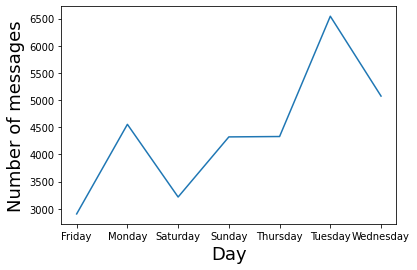

In [111]:
graph = df.groupby(df['day'])['text'].count().plot()
graph.set_xlabel('Day', fontsize=18)
graph.set_ylabel('Number of messages', fontsize=18)

This shows us how many messages were sent compared to the day of the week.

Seems like Tuesday has been the busiest day!

We are also able to take a look at which date  had the most messages sent.

Sorting by 'date' instead of 'day of week' will let us view the data by the date each message was sent.

Text(0, 0.5, 'Number of messages')

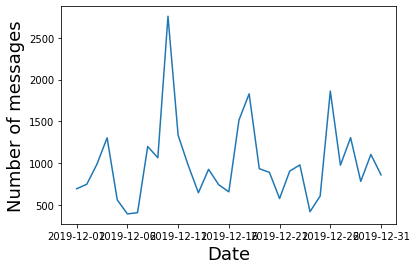

In [119]:
#graph2 = df.groupby(df['time'].dt.day)['text'].count().plot()
#graph2.set_xlabel('Date', fontsize=18)
#graph2.set_ylabel('Number of messages', fontsize=18)
graph2 = df.groupby(df['date'])['text'].count().plot()
#graph2.set_xticklabels(df['date'], fontdict='verticalalignment': 'baseline')
graph2.set_xlabel('Date', fontsize=18)
graph2.set_ylabel('Number of messages', fontsize=18)

# Challenges

Add activites for users to learn interactively

Add sample data set have users do simple tasks

In [ ]:
score = 0
questions = 5

In [ ]:
print("Find how many messages 'Kaliope' sent.")

In [ ]:
answer1 = input()

In [ ]:
if answer1 == "df['user'].value_counts()['Kaliope']":
  print("Correct!")
  score += 1
else:
  print("Incorrect")
  print("One way to solve this is:")
  print("")
  print("df['user'].value_counts()['Kaliope']")

In [ ]:
score = round(score/questions*100)
print('Quiz completed.')
print('Your final score is {}%.'.format(score))

In [ ]:
if int(score) >= 70:
    print("Congrats, you passed!")
else:
    print("Sorry, you failed.")